<a href="https://colab.research.google.com/github/blacksheep-group/2324-HGProgTeam/blob/gelo/HungrAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FastAI Installation**

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

## **Download Food Dataset**

In [2]:
foodPath = untar_data(URLs.FOOD)

## **Check the Dataset**

In [6]:
get_image_files(foodPath) #generate options from dataset

(#101000) [Path('/root/.fastai/data/food-101/images/clam_chowder/1418012.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/212257.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/2685960.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/1783836.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/3008112.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/2179204.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/209310.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/2792940.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/1023442.jpg'),Path('/root/.fastai/data/food-101/images/clam_chowder/2946776.jpg')...]

<Axes: >

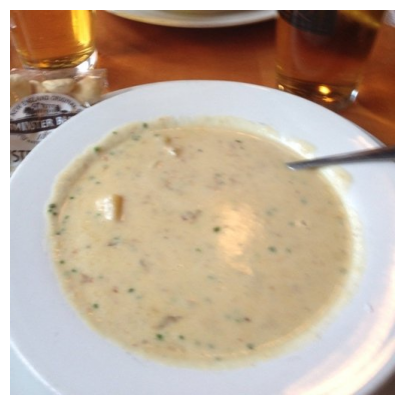

In [5]:
img = PILImage.create('/root/.fastai/data/food-101/images/clam_chowder/2792940.jpg') #input one file address from the generated options
img.show()

In [8]:
len(get_image_files(foodPath)) #number of dataset

101000

In [7]:
pd.read_json('/root/.fastai/data/food-101/train.json') #use pandas to tabulate data

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,churros/977938,hot_and_sour_soup/983606,samosa/987023,sashimi/98340,pork_chop/968836,spring_rolls/989498,panna_cotta/971492,beef_tartare/97708,greek_salad/986206,foie_gras/950701,...,chicken_quesadilla/992658,pho/969401,prime_rib/992983,cheesecake/952846,ice_cream/978261,omelette/966004,grilled_cheese_sandwich/981992,lobster_roll_sandwich/982053,nachos/99074,oysters/982030
746,churros/978170,hot_and_sour_soup/991636,samosa/989842,sashimi/987088,pork_chop/96943,spring_rolls/995483,panna_cotta/972152,beef_tartare/987587,greek_salad/994568,foie_gras/952007,...,chicken_quesadilla/993661,pho/981313,prime_rib/993496,cheesecake/958209,ice_cream/978988,omelette/968330,grilled_cheese_sandwich/986899,lobster_roll_sandwich/987229,nachos/99076,oysters/98268
747,churros/98227,hot_and_sour_soup/993036,samosa/991952,sashimi/987318,pork_chop/970362,spring_rolls/996700,panna_cotta/973687,beef_tartare/987926,greek_salad/995049,foie_gras/976580,...,chicken_quesadilla/993767,pho/988049,prime_rib/996023,cheesecake/971470,ice_cream/987631,omelette/979474,grilled_cheese_sandwich/987731,lobster_roll_sandwich/990202,nachos/99087,oysters/98313
748,churros/993534,hot_and_sour_soup/997881,samosa/992201,sashimi/993162,pork_chop/99168,spring_rolls/998226,panna_cotta/97774,beef_tartare/999120,greek_salad/99676,foie_gras/978439,...,chicken_quesadilla/997377,pho/998863,prime_rib/998348,cheesecake/983639,ice_cream/988684,omelette/981323,grilled_cheese_sandwich/997050,lobster_roll_sandwich/99754,nachos/992029,oysters/990299


In [9]:
#Deciding which two foods we want to classify
labelA = 'chicken_quesadilla'
labelB = 'beef_tartare'

## **Data Preparation**
  - isolating the needed groups
  - renaming the files in the groups

In [10]:
#Loop through all Images downloaded
for img in get_image_files(foodPath):
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(foodPath))

2000

## **Train Model**

  The function "GetLabel" would serve as the identifier of the name of the image for the computer to communicate it back to the user.

In [11]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("churros-734186.jpg") #Testing

'churros'

Call-in Data Loader

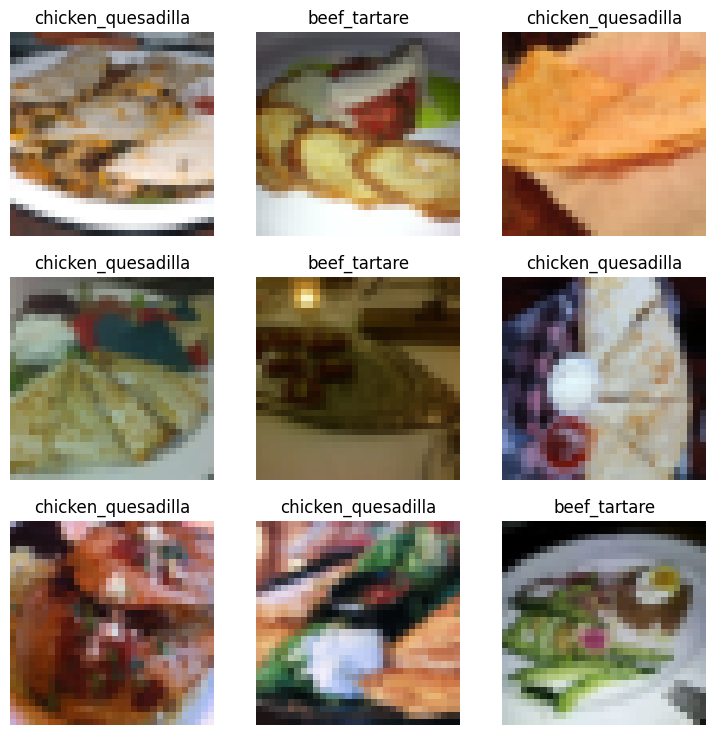

In [12]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(32))

dls.train.show_batch()

Actual Training

In [13]:
learn = vision_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=10) #number of epochs is user-defined

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 80.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.138075,0.654542,0.290000,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.938997,0.699430,0.285000,00:11
1,0.816515,0.749981,0.295000,00:11
2,0.709143,0.742184,0.267500,00:11
3,0.599269,0.770601,0.297500,00:11
4,0.485051,0.691766,0.225000,00:10
5,0.383305,0.734103,0.235000,00:08
6,0.300487,0.711225,0.212500,00:10
7,0.236239,0.726433,0.212500,00:08
8,0.194089,0.716419,0.215000,00:08
9,0.159394,0.724310,0.212500,00:09


## **Test the Model**

Using own image:

Saving 01c3a0f5fe8e4faebcaff9fe4ba95b97.jpg to 01c3a0f5fe8e4faebcaff9fe4ba95b97.jpg


This is a chicken_quesadilla.
chicken_quesadilla 0.829195
beef_tartare 0.170805


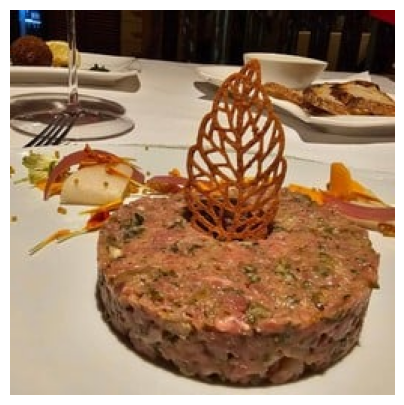

In [14]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"{labelA} {probs[1].item():.6f}")
print(f"{labelB} {probs[0].item():.6f}")

Using images from dataset:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

## **Exporting and Accessing Model**

In [ ]:
learn.export() #exports model as 'export.pkl' by default

In [ ]:
#let's grab the first pkl file we can find
modelPath = get_files(foodPath, '.pkl')[0]
modelPath

In [ ]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0])) #raw prediction

In [ ]:
learn_inf.dls.vocab #Get the labels

In [ ]:
#This seems to only work properly in Chrome
from google.colab import files
files.download(modelPath)